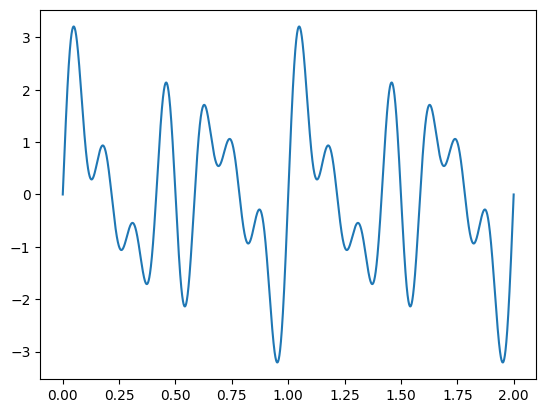

In [20]:
import numpy as np
import matplotlib.pyplot as plt

T = np.linspace(0, 2, 10000)

def gen_signal(freqs: list[int], t = T):
  base = np.zeros(t.shape)
  for freq in freqs:
    base += np.sin(2 * np.pi * freq * t)
  return base

plt.plot(T, gen_signal([2, 3, 5, 7]))

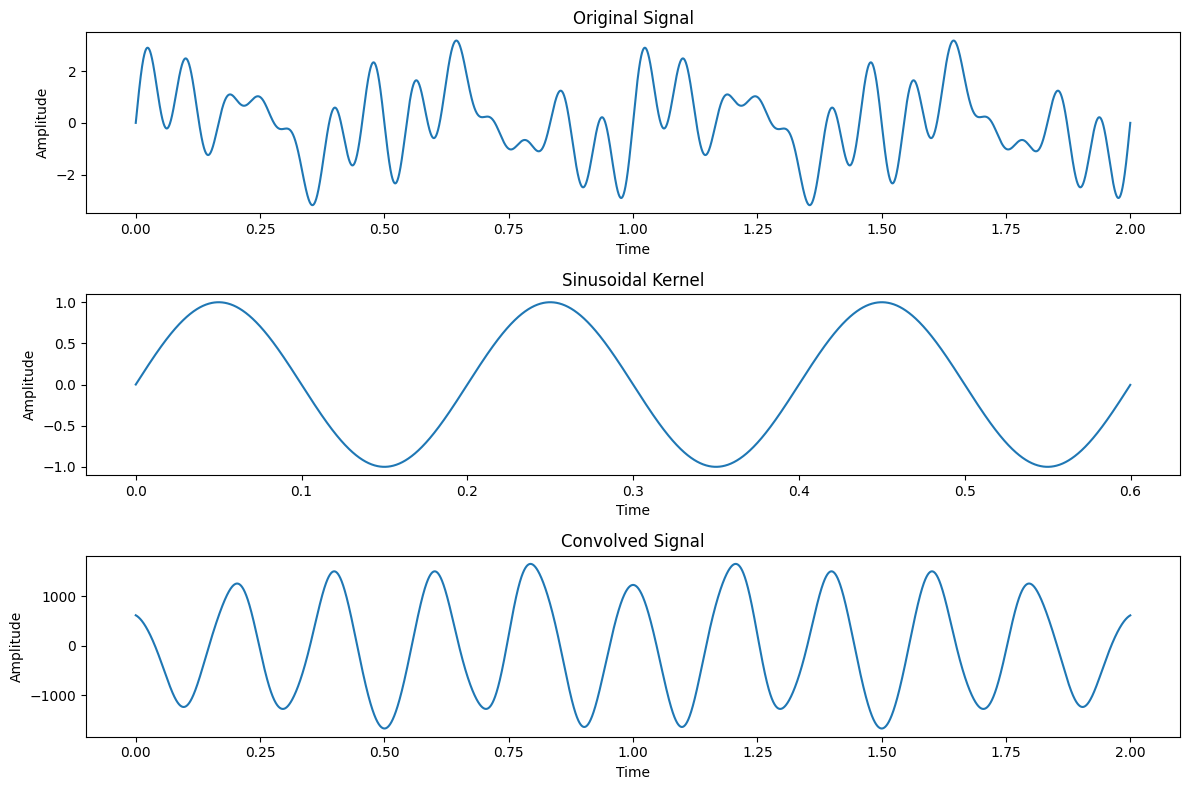

In [21]:
from scipy.signal import convolve

# Define the signal
signal = gen_signal([2, 5, 11, 13])

sinusoidal_kernel_freq = 5
sinusoidal_kernel_len = 3000
sinusoidal_kernel = np.sin(2 * np.pi * sinusoidal_kernel_freq * T[:sinusoidal_kernel_len]) # Use a shorter segment as the kernel

# Convolve the signal with the sinusoidal kernel
convolved_signal = convolve(signal, sinusoidal_kernel, mode='same')

# Plot the original signal, the kernel, and the convolved signal
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(T, signal)
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(T[:sinusoidal_kernel_len], sinusoidal_kernel)
plt.title('Sinusoidal Kernel')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(T, convolved_signal)
plt.title('Convolved Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

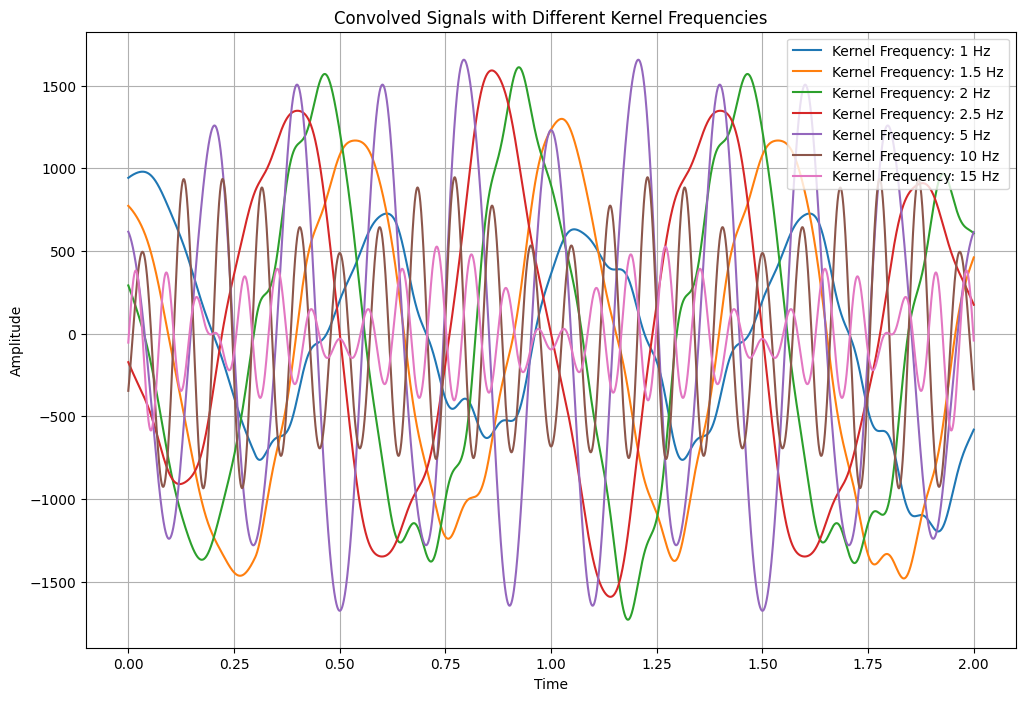

In [22]:
# Define a list of frequencies for the kernels
kernel_frequencies = [1, 1.5, 2, 2.5, 5, 10, 15] # Example frequencies

plt.figure(figsize=(12, 8))

for freq in kernel_frequencies:
  # Create a sinusoidal kernel for the current frequency
  sinusoidal_kernel = np.sin(2 * np.pi * freq * T[:sinusoidal_kernel_len])

  # Convolve the signal with the current kernel
  convolved_signal = convolve(signal, sinusoidal_kernel, mode='same')

  # Plot the convolved signal on the same plot
  plt.plot(T, convolved_signal, label=f'Kernel Frequency: {freq} Hz')

plt.title('Convolved Signals with Different Kernel Frequencies')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()